In [1]:
from config import *

In [2]:
levelups_ref = pd.read_csv("../data/levelups_panel_20240305.csv", encoding="utf-8")

In [3]:

#Extract Date Time
levelups_ref['date_event'] = pd.to_datetime(levelups_ref['event_datetime']).dt.date
levelups_ref['date_event_prev'] = pd.to_datetime(levelups_ref['event_datetime_prev']).dt.date
levelups_ref['same_date'] = levelups_ref['date_event'] == levelups_ref['date_event_prev']

#플레이어 및 같은 날짜별 그룹화 및 해당 날짜 플레이 시간 계산
#Calculate playtime for each date by player
same_date_data = levelups_ref[levelups_ref['same_date']]
date_interval_sum = same_date_data.groupby(['player_slug', 'date_event'])['interval'].sum().reset_index()
date_interval_sum.rename(columns={'interval': 'date_interval'}, inplace=True)

levelups_ref = levelups_ref.merge(date_interval_sum, left_on=['player_slug', 'date_event'], right_on=['player_slug', 'date_event'], how='left')


In [4]:
mean_date_interval = levelups_ref['date_interval'].mean()
std_date_interval = levelups_ref['date_interval'].std()

print(f"Date Interval 평균: {mean_date_interval}")
print(f"Date Interval 표준편차: {std_date_interval}")

Date Interval 평균: 5.7678923659319015
Date Interval 표준편차: 6.312332526564661


In [5]:

max_date_interval = levelups_ref['date_interval'].max()


max_date_interval_index = levelups_ref[levelups_ref['date_interval'] == max_date_interval].index[0]

max_date_interval_row = levelups_ref.loc[max_date_interval_index]


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

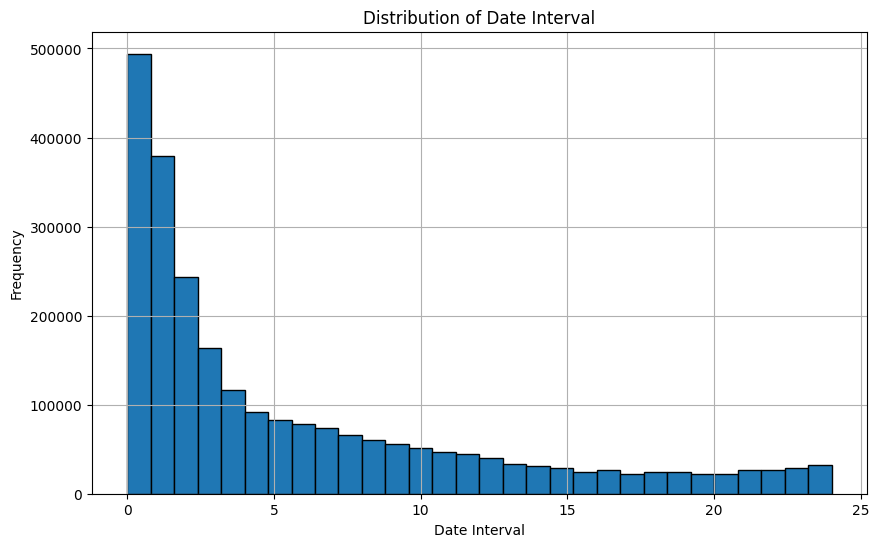

In [6]:

plt.figure(figsize=(10, 6))
plt.hist(levelups_ref['date_interval'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Date Interval')
plt.xlabel('Date Interval')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
time_played = levelups_ref.groupby(["player_slug","character_slug"])["date_interval"].max()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

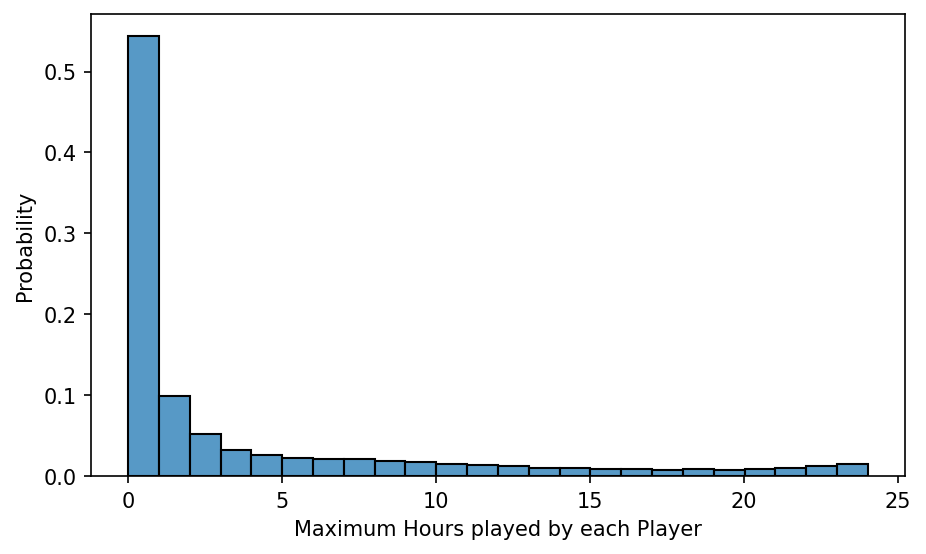

In [8]:
plt.rcParams["figure.figsize"] = [7,4]; plt.rcParams["figure.dpi"] = 150
sns.histplot(time_played, binwidth=1, stat="probability")
plt.xlabel("Maximum Hours played by each Player")
plt.show()

In [9]:
#Calculate Maximum playing time for each player
max_interval_per_player = levelups_ref.loc[levelups_ref.groupby('player_slug')['interval'].idxmax()]
#Calculate top 20% of playing time
max_interval_per_player['date_interval'].quantile(0.8)

3.5956666666666646

In [12]:
#Clarify Binge player
max_interval_per_player['binge'] = max_interval_per_player['date_interval'].apply(lambda x: 1 if x >= 3.5 else 0)


In [13]:
levelups_ref = levelups_ref.merge(max_interval_per_player[['player_slug', 'binge']], on='player_slug', how='left')


In [15]:
levelups_ref.to_csv('levelups_panel_20240717.csv',index=False,encoding='utf-8')

In [16]:
levelups_ref.to_csv('levelups_panel_20240717_cp949.csv',index=False,encoding='cp949')

## Level-Interval Plot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("levelups_panel_20240717.csv", encoding="utf-8")

In [3]:
data_level_term = data[['player_slug', 'level_to', 'interval']]

# 데이터 피벗
pivot_data = data_level_term.pivot_table(index='player_slug', columns='level_to', values='interval', aggfunc='mean')

# NaN 값을 0으로 채움 (필요에 따라 다른 값으로 채울 수 있음)
#pivot_data = pivot_data.fillna(0)

In [4]:
# 값이 0인 항목을 NaN으로 대체
#pivot_data = pivot_data.replace(0, pd.NA)

# 각 컬럼별 평균 계산 (NaN 값을 무시)
column_means = pivot_data.mean(skipna=True)
column_medians = pivot_data.median(skipna=True)
column_std = pivot_data.std(skipna=True)


In [5]:
# 결과를 새로운 CSV 파일로 저장
output_file_path = 'pivot_interval.csv'  # 본인의 파일 경로로 변경
pivot_data.to_csv(output_file_path, encoding="utf-8")
pivot_data.to_csv('pivot_interval_cp.csv', encoding="cp949")

In [6]:
#Random Sample 20000
sampled_data = pivot_data.sample(n=20000, random_state=42)


In [7]:
#pivot_data_reset = pivot_data.reset_index().melt(id_vars='character_slug', var_name='level_to', value_name='interval')
pivot_data_reset = sampled_data.reset_index().melt(id_vars='player_slug', var_name='level_to', value_name='interval')


In [8]:
pivot_data_reset


,player_slug,level_to,interval
0,2021-12-20T09:12:07.453Z,2,0.008611
1,2021-12-19T18:00:45.718Z,2,0.013333
2,2022-01-02T09:49:39.769Z,2,0.008056
3,2021-12-24T06:58:23.461Z,2,0.011389
4,2022-01-05T13:08:45.878Z,2,0.011389
...,...,...,...
5639995,2022-01-07T10:58:24.420Z,283,NaN
5639996,2021-12-17T13:20:59.273Z,283,NaN
5639997,2022-03-09T12:50:31.269Z,283,NaN
5639998,2021-12-22T19:58:37.784Z,283,NaN


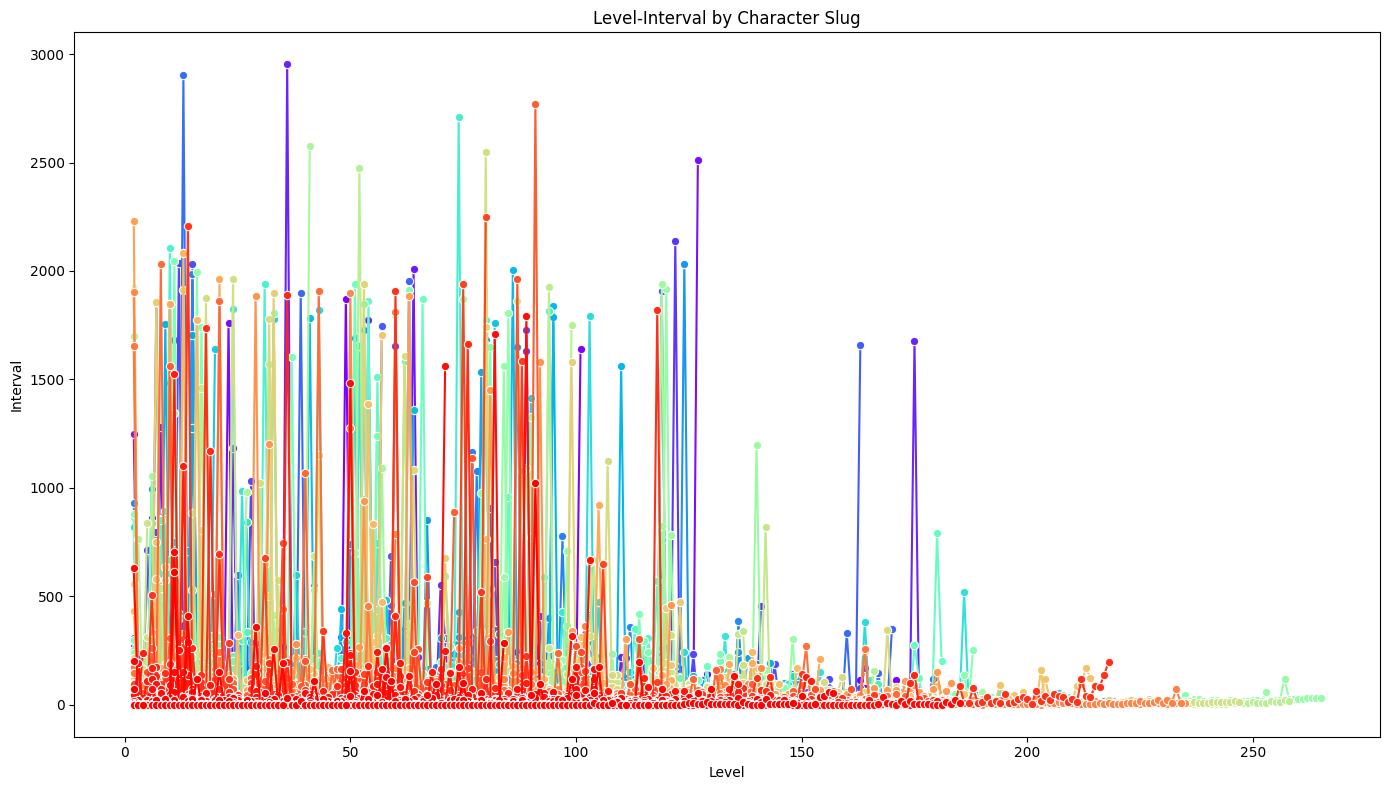

In [9]:
# 플롯 생성
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_data_reset, x='level_to', y='interval', hue='player_slug', palette='rainbow', marker='o', legend=False)

# 플롯 커스터마이징
plt.title('Level-Interval by Character Slug')
plt.xlabel('Level')
plt.ylabel('Interval')

# 플롯 표시
plt.tight_layout()
plt.show()

## Level-Interval Ratio

In [4]:
data['binge'] = (data['first_session_level'] >= 50).astype(int)
# 각 player_slug별로 비율 계산
data['prev_interval'] = data.groupby('player_slug')['interval'].shift(1)
data['interval_ratio'] = data.apply(lambda row: row['interval'] / (row['prev_interval'] if pd.notnull(row['prev_interval']) else row['interval']), axis=1)


In [5]:
data

,player_slug,character_slug,first_session_level,binger,total_purchase,total_ad,highest_level,status,level_from,level_to,...,playtime_farm,playtime_survival,playtime_side,date_event,date_event_prev,same_date,date_interval,binge,prev_interval,interval_ratio
0,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,1,2,...,0.0,0.0,0.0,2021-11-04,2021-11-04,True,0.009444,0,NaN,1.000000
1,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,2,3,...,0.0,0.0,0.0,2021-11-13,2021-11-04,False,5.426389,0,0.009444,21191.117647
2,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,3,4,...,0.0,0.0,0.0,2021-11-13,2021-11-13,True,5.426389,0,200.138333,0.000132
3,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,4,5,...,0.0,0.0,0.0,2021-11-13,2021-11-13,True,5.426389,0,0.026389,201.863158
4,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,5,6,...,0.0,0.0,0.0,2021-11-13,2021-11-13,True,5.426389,0,5.326944,0.009803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466992,2022-03-30T14:36:22.522Z,킹키킹,8,0,0.0,0.0,8,complete,3,4,...,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0,0.032778,1.033898
2466993,2022-03-30T14:36:22.522Z,킹키킹,8,0,0.0,0.0,8,complete,4,5,...,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0,0.033889,1.024590
2466994,2022-03-30T14:36:22.522Z,킹키킹,8,0,0.0,0.0,8,complete,5,6,...,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0,0.034722,0.568000
2466995,2022-03-30T14:36:22.522Z,킹키킹,8,0,0.0,0.0,8,complete,6,7,...,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0,0.019722,1.126761


In [6]:
data_ratio_term = data[['player_slug','binge', 'level_to', 'interval_ratio']]

# 데이터 피벗
pivot_data_ratio = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval_ratio', aggfunc='mean')
binge_series = data.drop_duplicates('player_slug').set_index('player_slug')['binge']
pivot_data_ratio = pivot_data_ratio.join(binge_series)



In [7]:
#Random Sample 20000
sampled_data = pivot_data_ratio.sample(n=20000, random_state=102)
#pivot_data_reset = pivot_data.reset_index().melt(id_vars='character_slug', var_name='level_to', value_name='interval')
pivot_data_reset = sampled_data.reset_index().melt(id_vars=['player_slug', 'binge'], var_name='level_to', value_name='interval_ratio')


In [14]:
pivot_data_reset

,player_slug,binge,level_to,interval_ratio
0,2021-12-19T14:42:01.626Z,0,2,1.0
1,2022-03-08T12:53:50.466Z,0,2,1.0
2,2021-12-20T03:18:15.702Z,0,2,1.0
3,2022-02-03T05:55:24.709Z,0,2,1.0
4,2022-02-15T15:11:48.056Z,0,2,1.0
...,...,...,...,...
5639995,2021-12-22T05:29:42.291Z,0,283,NaN
5639996,2022-03-08T13:37:05.334Z,0,283,NaN
5639997,2021-12-17T18:07:24.521Z,1,283,NaN
5639998,2022-01-07T14:16:00.448Z,0,283,NaN


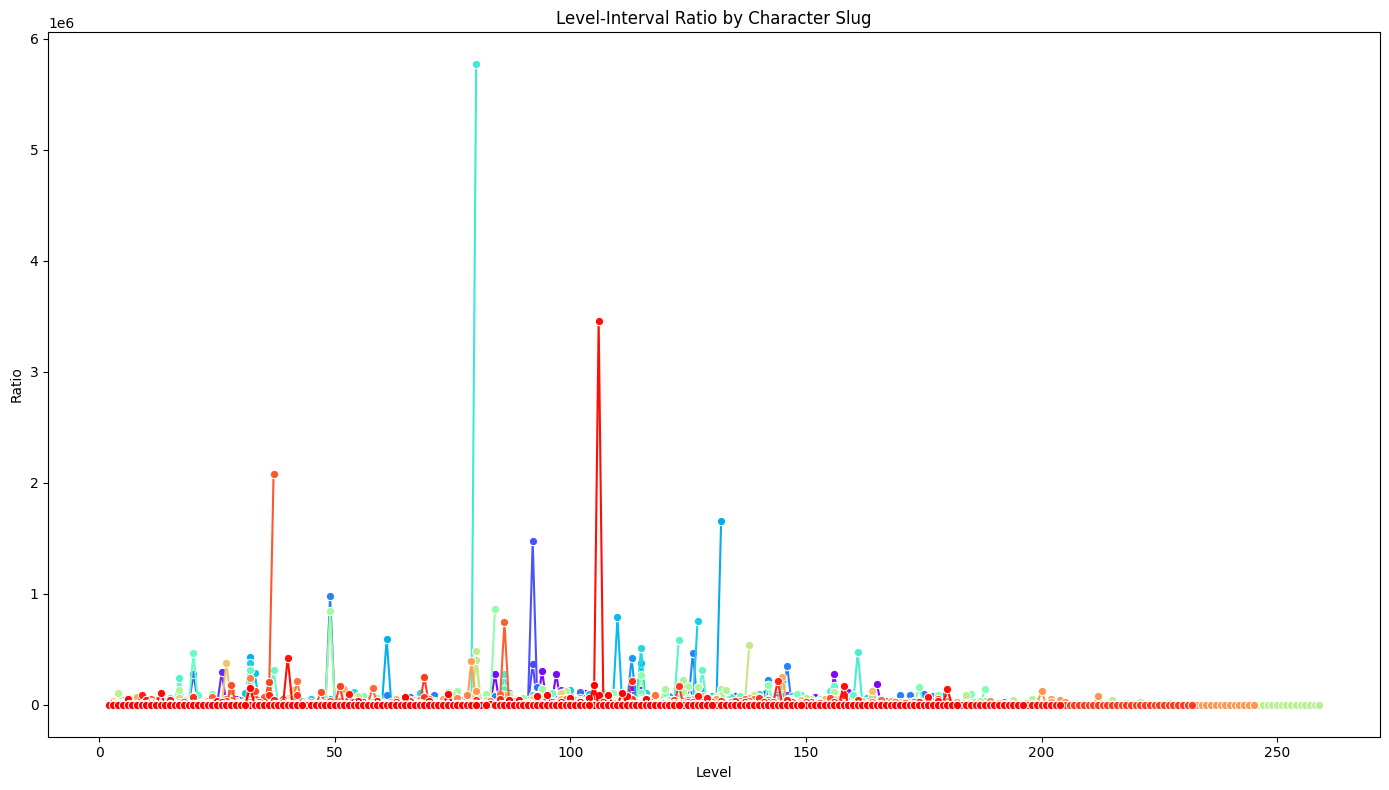

In [15]:
# 플롯 생성
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_data_reset, x='level_to', y='interval_ratio', hue='player_slug', palette='rainbow', marker='o', legend=False)

# 플롯 커스터마이징
plt.title('Level-Interval Ratio by Character Slug')
plt.xlabel('Level')
plt.ylabel('Ratio')

# 플롯 표시
plt.tight_layout()
plt.show()

In [16]:
pivot_data_ratio

,2,3,4,5,6,7,8,9,10,11,...,275,276,277,278,279,280,281,282,283,binge
player_slug,,,,,,,,,,,,,,,,,,,,,
2021-10-31T16:01:57.631Z,1.0,21191.117647,0.000132,201.863158,0.009803,0.398936,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-10-31T23:13:52.512Z,1.0,0.596154,2.193548,1.044118,1.647887,0.777778,1.054945,1.312500,1.166667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-11-01T00:29:22.357Z,1.0,0.278689,1.882353,1.843750,1.135593,1.119403,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-11-01T03:34:17.980Z,1.0,1.022222,1.434783,0.787879,2.346154,0.680328,1.108434,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-11-01T05:12:15.383Z,1.0,0.460674,3.146341,2.604651,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30T13:53:30.032Z,1.0,0.350000,2.642857,1.540541,2.736842,0.512821,1.075000,1.244186,1.140187,1.262295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-30T14:09:03.502Z,1.0,1.030303,3.000000,1.019608,0.875000,0.967033,1.022727,1.255556,1.371681,1.103226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-30T14:13:23.546Z,1.0,0.696970,1.434783,1.969697,0.876923,1.824561,0.721154,1.520000,1.140351,1.176923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
column_means = pivot_data_ratio.mean(skipna=True)
column_medians = pivot_data_ratio.median(skipna=True)
column_std = pivot_data_ratio.std(skipna=True)



In [9]:
column_means

2         1.000000
3        14.905696
4        48.908133
5        12.287495
6        36.268093
           ...    
280       1.081318
281       1.056036
282       1.507253
283       0.723354
binge     0.216794
Length: 283, dtype: float64

In [10]:
column_medians

2        1.000000
3        0.535714
4        2.261905
5        1.254545
6        1.357143
           ...   
280      1.081318
281      1.056036
282      1.507253
283      0.723354
binge    0.000000
Length: 283, dtype: float64

In [11]:
column_std

2           0.000000
3         566.541912
4        2404.551217
5         333.208220
6         833.334266
            ...     
280              NaN
281              NaN
282              NaN
283              NaN
binge       0.412065
Length: 283, dtype: float64

In [12]:
na_counts = pivot_data_ratio.isna().sum()
na_counts[:50]

2         0
3       704
4      1371
5      1901
6      8438
7     10047
8     11873
9     14135
10    16371
11    18888
12    20328
13    21842
14    22995
15    23951
16    24398
17    25236
18    26150
19    26299
20    26827
21    27520
22    27739
23    28125
24    28512
25    28684
26    28827
27    29078
28    29388
29    29718
30    30077
31    30692
32    31521
33    32237
34    32760
35    33082
36    33348
37    33637
38    33856
39    33984
40    34305
41    34775
42    35267
43    35736
44    36015
45    36187
46    36291
47    36417
48    36770
49    37207
50    37636
51    38277
dtype: int64

## Filling out the Null Data

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

pivot_data_ratio[pivot_data_ratio > 10] = np.nan


In [14]:
na_counts = pivot_data_ratio.isna().sum()
na_counts[:50]

2         0
3      1341
4      2769
5      2737
6      9908
7     11141
8     12842
9     15224
10    17467
11    20057
12    21182
13    22851
14    23783
15    24778
16    24794
17    26783
18    27434
19    26483
20    30201
21    29055
22    28085
23    29567
24    29485
25    28970
26    29291
27    31371
28    30271
29    30614
30    31044
31    31613
32    34166
33    34735
34    34154
35    33935
36    35495
37    36462
38    35468
39    34754
40    38371
41    36489
42    36369
43    36511
44    36494
45    36497
46    36603
47    37167
48    40162
49    38736
50    38556
51    39352
dtype: int64

In [15]:
pivot_data_ratio

,2,3,4,5,6,7,8,9,10,11,...,275,276,277,278,279,280,281,282,283,binge
player_slug,,,,,,,,,,,,,,,,,,,,,
2021-10-31T16:01:57.631Z,1.0,NaN,0.000132,NaN,0.009803,0.398936,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-10-31T23:13:52.512Z,1.0,0.596154,2.193548,1.044118,1.647887,0.777778,1.054945,1.312500,1.166667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-11-01T00:29:22.357Z,1.0,0.278689,1.882353,1.843750,1.135593,1.119403,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-11-01T03:34:17.980Z,1.0,1.022222,1.434783,0.787879,2.346154,0.680328,1.108434,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-11-01T05:12:15.383Z,1.0,0.460674,3.146341,2.604651,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30T13:53:30.032Z,1.0,0.350000,2.642857,1.540541,2.736842,0.512821,1.075000,1.244186,1.140187,1.262295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-30T14:09:03.502Z,1.0,1.030303,3.000000,1.019608,0.875000,0.967033,1.022727,1.255556,1.371681,1.103226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-30T14:13:23.546Z,1.0,0.696970,1.434783,1.969697,0.876923,1.824561,0.721154,1.520000,1.140351,1.176923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [32]:
#columns_to_keep = list(pivot_data_ratio.columns[:100]) + ['binge']
#pivot_data_ratio2 = pivot_data_ratio[columns_to_keep]

In [33]:
# Synthetic Control Method를 사용하여 결측값 채우기
from tqdm import tqdm
def synthetic_control(data, binge_col='binge'):
    treated_units = data[data[binge_col] == 1]
    control_units = data[data[binge_col] == 0].drop(columns=binge_col)
    
    print(f'Total treated units: {len(treated_units)}')

    for idx, row in tqdm(treated_units.iterrows(), total=len(treated_units), desc='Processing treated units'):
        missing_cols = row[row.isna()].index.tolist()
        if missing_cols:
            for col in missing_cols:
                # 전처리 기간 데이터
                pre_period_data = data.dropna(subset=[col])
                control_pre_period = control_units.loc[control_units.index.intersection(pre_period_data.index)]
                X0 = control_pre_period.values
                X1 = pre_period_data.loc[pre_period_data[binge_col] == 1, col].values

                # 차원 맞추기
                if X0.shape[0] != X1.shape[0]:
                    min_size = min(X0.shape[0], X1.shape[0])
                    X0 = X0[:min_size]
                    X1 = X1[:min_size]

                if X1.size > 0 and X0.size > 0:  # 데이터가 충분한 경우에만 진행
                    # 가중치 계산 (최소제곱법 사용)
                    try:
                        W = np.linalg.inv(X0.T @ X0) @ X0.T @ X1
                    except np.linalg.LinAlgError:
                        W = np.linalg.lstsq(X0, X1, rcond=None)[0]

                    W = np.clip(W, 0, 1)  # 가중치를 0과 1 사이로 클립

                    # 합성 대조군 구성
                    synthetic_control = X0 @ W

                    # 결측값 채우기
                    data.at[idx, col] = synthetic_control.mean()
    
    return data
pivot_data_ratio_refined = synthetic_control(pivot_data_ratio2)


Total treated units: 12865


Processing treated units:   0%|          | 18/12865 [00:09<1:51:45,  1.92it/s]


KeyboardInterrupt: 

## Cutting Data to 100LV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("levelups_panel_20240717.csv", encoding="utf-8")

In [2]:
# level_to 컬럼의 값이 100을 넘는 행 제거
data = data[data['level_to'] <= 100]
data['binge'] = (data['first_session_level'] >= 50).astype(int)
# 각 player_slug별로 비율 계산
data['prev_interval'] = data.groupby('player_slug')['interval'].shift(1)
data['interval_ratio'] = data.apply(lambda row: row['interval'] / (row['prev_interval'] if pd.notnull(row['prev_interval']) else row['interval']), axis=1)


data_ratio_term = data[['player_slug','binge', 'level_to', 'interval_ratio']]

# 데이터 피벗
pivot_data_ratio = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval_ratio', aggfunc='mean')
binge_series = data.drop_duplicates('player_slug').set_index('player_slug')['binge']
pivot_data_ratio = pivot_data_ratio.join(binge_series)


#Random Sample 20000
sampled_data = pivot_data_ratio.sample(n=20000, random_state=102)
#pivot_data_reset = pivot_data.reset_index().melt(id_vars='character_slug', var_name='level_to', value_name='interval')
pivot_data_reset = sampled_data.reset_index().melt(id_vars=['player_slug', 'binge'], var_name='level_to', value_name='interval_ratio')


In [3]:
column_medians = pivot_data_ratio.median(skipna=True)
column_medians.max()

4.4000000000000625

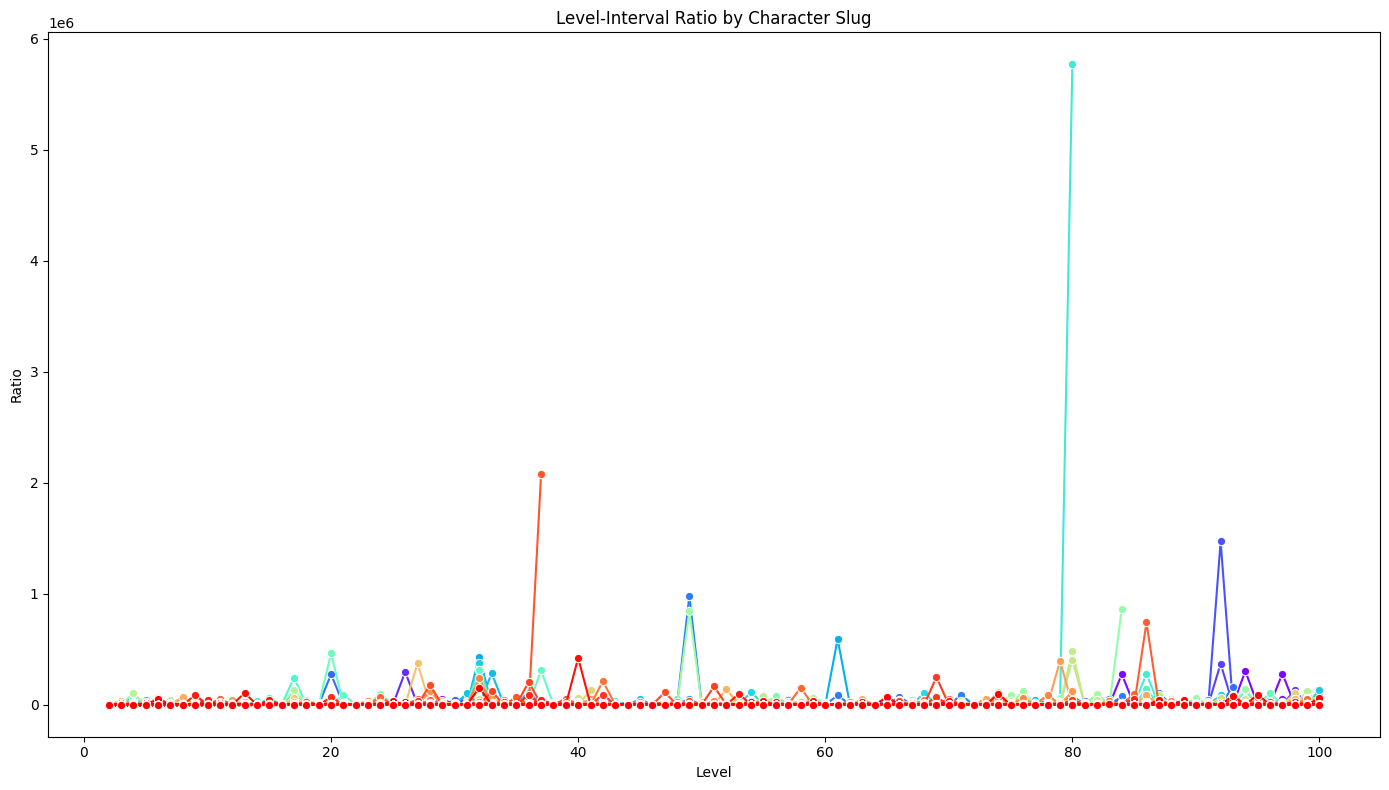

In [36]:
# 플롯 생성
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_data_reset, x='level_to', y='interval_ratio', hue='player_slug', palette='rainbow', marker='o', legend=False)

# 플롯 커스터마이징
plt.title('Level-Interval Ratio by Character Slug')
plt.xlabel('Level')
plt.ylabel('Ratio')

# 플롯 표시
plt.tight_layout()
plt.show()

In [4]:
column_means = pivot_data_ratio.mean(skipna=True)
column_medians = pivot_data_ratio.median(skipna=True)
column_std = pivot_data_ratio.std(skipna=True)


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

pivot_data_ratio[pivot_data_ratio > 10] = np.nan
na_counts = pivot_data_ratio.isna().sum()
na_counts[:50]

2         0
3      1341
4      2769
5      2737
6      9908
7     11141
8     12842
9     15224
10    17467
11    20057
12    21182
13    22851
14    23783
15    24778
16    24794
17    26783
18    27434
19    26483
20    30201
21    29055
22    28085
23    29567
24    29485
25    28970
26    29291
27    31371
28    30271
29    30614
30    31044
31    31613
32    34166
33    34735
34    34154
35    33935
36    35495
37    36462
38    35468
39    34754
40    38371
41    36489
42    36369
43    36511
44    36494
45    36497
46    36603
47    37167
48    40162
49    38736
50    38556
51    39352
dtype: int64

In [39]:
# Synthetic Control Method를 사용하여 결측값 채우기
from tqdm import tqdm
def synthetic_control(data, binge_col='binge'):
    treated_units = data[data[binge_col] == 1]
    control_units = data[data[binge_col] == 0].drop(columns=binge_col)
    
    print(f'Total treated units: {len(treated_units)}')

    for idx, row in tqdm(treated_units.iterrows(), total=len(treated_units), desc='Processing treated units'):
        missing_cols = row[row.isna()].index.tolist()
        if missing_cols:
            for col in missing_cols:
                # 전처리 기간 데이터
                pre_period_data = data.dropna(subset=[col])
                control_pre_period = control_units.loc[control_units.index.intersection(pre_period_data.index)]
                X0 = control_pre_period.values
                X1 = pre_period_data.loc[pre_period_data[binge_col] == 1, col].values

                # 차원 맞추기
                if X0.shape[0] != X1.shape[0]:
                    min_size = min(X0.shape[0], X1.shape[0])
                    X0 = X0[:min_size]
                    X1 = X1[:min_size]

                if X1.size > 0 and X0.size > 0:  # 데이터가 충분한 경우에만 진행
                    # 가중치 계산 (최소제곱법 사용)
                    try:
                        W = np.linalg.inv(X0.T @ X0) @ X0.T @ X1
                    except np.linalg.LinAlgError:
                        W = np.linalg.lstsq(X0, X1, rcond=None)[0]

                    W = np.clip(W, 0, 1)  # 가중치를 0과 1 사이로 클립

                    # 합성 대조군 구성
                    synthetic_control = X0 @ W

                    # 결측값 채우기
                    data.at[idx, col] = synthetic_control.mean()
    
    return data
pivot_data_ratio_refined = synthetic_control(pivot_data_ratio)


Total treated units: 12865


Processing treated units: 100%|██████████| 12865/12865 [1:33:30<00:00,  2.29it/s]  


In [40]:
# 결과 확인
print(pivot_data_ratio_refined.head())

# 결과 저장
output_file_path = 'pivot_data_ratio_filled.csv'
pivot_data_ratio_refined.to_csv(output_file_path,encoding='utf-8')

print(f"파일이 저장되었습니다: {output_file_path}")

                            2         3         4         5         6  \
player_slug                                                             
2021-10-31T16:01:57.631Z  1.0       NaN  0.000132       NaN  0.009803   
2021-10-31T23:13:52.512Z  1.0  0.596154  2.193548  1.044118  1.647887   
2021-11-01T00:29:22.357Z  1.0  0.278689  1.882353  1.843750  1.135593   
2021-11-01T03:34:17.980Z  1.0  1.022222  1.434783  0.787879  2.346154   
2021-11-01T05:12:15.383Z  1.0  0.460674  3.146341  2.604651       NaN   

                                 7         8       9        10  11  ...  92  \
player_slug                                                         ...       
2021-10-31T16:01:57.631Z  0.398936       NaN     NaN       NaN NaN  ... NaN   
2021-10-31T23:13:52.512Z  0.777778  1.054945  1.3125  1.166667 NaN  ... NaN   
2021-11-01T00:29:22.357Z  1.119403       NaN     NaN       NaN NaN  ... NaN   
2021-11-01T03:34:17.980Z  0.680328  1.108434     NaN       NaN NaN  ... NaN   
2021-11-01T05:

In [9]:
sampled_data = pivot_data_ratio.sample(n=2000, random_state=42)

In [10]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
def process_treated_unit(idx, row, control_units, data, binge_col):
    missing_cols = row[row.isna()].index.tolist()
    if missing_cols:
        for col in missing_cols:
            # 전처리 기간 데이터
            pre_period_data = data.dropna(subset=[col])
            control_pre_period = control_units.loc[control_units.index.intersection(pre_period_data.index)]
            X0 = control_pre_period.values
            X1 = pre_period_data.loc[pre_period_data[binge_col] == 1, col].values

            # 차원 맞추기
            if X0.shape[0] != X1.shape[0]:
                min_size = min(X0.shape[0], X1.shape[0])
                X0 = X0[:min_size]
                X1 = X1[:min_size]

            if X1.size > 0 and X0.size > 0:  # 데이터가 충분한 경우에만 진행
                # 가중치 계산 (최소제곱법 사용)
                try:
                    W = np.linalg.inv(X0.T @ X0) @ X0.T @ X1
                except np.linalg.LinAlgError:
                    W = np.linalg.lstsq(X0, X1, rcond=None)[0]

                W = np.clip(W, 0, 1)  # 가중치를 0과 1 사이로 클립

                # 합성 대조군 구성
                synthetic_control = X0 @ W

                # 결측값 채우기
                data.at[idx, col] = synthetic_control.mean()
            else:
                print(f"Insufficient data for idx {idx}, col {col}")

def fill_missing_values_with_synthetic_control(data, binge_col='binge'):
    treated_units = data[data[binge_col] == 1]
    control_units = data[data[binge_col] == 0].drop(columns=binge_col)
    
    print(f'Total treated units: {len(treated_units)}')

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_treated_unit, idx, row, control_units, data, binge_col) for idx, row in treated_units.iterrows()]
        for future in tqdm(futures, total=len(treated_units), desc='Processing treated units'):
            future.result()

    return data

# 결측값 채우기
pivot_data_ratio_filled2 = fill_missing_values_with_synthetic_control(sampled_data)

# 결과 확인
print(pivot_data_ratio_filled2.head())

Total treated units: 450


Processing treated units:  67%|██████▋   | 300/450 [21:31<20:56,  8.38s/it]  

: 

In [ ]:
# 결과 확인
print(pivot_data_ratio_filled2.head())

# 결과 저장
output_file_path = 'pivot_data_ratio_filled_second.csv'
pivot_data_ratio_filled2.to_csv(output_file_path,encoding='utf-8')

print(f"파일이 저장되었습니다: {output_file_path}")

NameError: name 'pivot_data_ratio_filled2' is not defined

In [16]:

from tqdm import tqdm
pre_period_data = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval_ratio', aggfunc='mean')


# Synthetic Control Method를 사용하여 결측값 채우기
def fill_missing_values(data, pre_period_data):
    for idx, row in tqdm(data.iterrows(), total=len(data), desc='Filling missing values'):
        if row.isna().sum() > 0:  # 결측값이 있는 경우
            # 결측값이 없는 열을 기준으로 전처리 기간 동안의 데이터를 가져옴
            non_na_columns = row.dropna().index.tolist()
            if len(non_na_columns) > 1:
                X_train = pre_period_data[non_na_columns].dropna(how='any')
                if X_train.empty:
                    print(f"Insufficient data for idx {idx}")
                    continue
                y_train = pre_period_data.loc[X_train.index, row.name]

                if len(y_train.dropna()) > 1:  # 충분한 데이터가 있는 경우에만 진행
                    model = LinearRegression().fit(X_train, y_train)
                    X_missing = row[non_na_columns].values.reshape(1, -1)
                    y_pred = model.predict(X_missing)

                    missing_columns = row.index[row.isna()].tolist()
                    for missing_column in missing_columns:
                        data.at[idx, missing_column] = y_pred[0]
# 데이터 프레임을 피벗
pivot_data_ratio = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval_ratio', aggfunc='mean')
sampled_data = pivot_data_ratio.sample(n=2000, random_state=42)
# 전처리 기간 데이터에서 결측값 채우기
fill_missing_values(sampled_data, pre_period_data)

# 'binge' 열을 player_slug를 기준으로 포함
binge_series = data.drop_duplicates('player_slug').set_index('player_slug')['binge']
pivot_data_ratio = pivot_data_ratio.join(binge_series)

# 결과 확인
print(pivot_data_ratio.head())


Filling missing values:   0%|          | 0/2000 [00:00<?, ?it/s]


KeyError: '2021-12-20T09:12:07.453Z'

In [10]:
sampled_data

level_to,2,3,4,5,6,7,8,9,10,11,...,91,92,93,94,95,96,97,98,99,100
player_slug,,,,,,,,,,,,,,,,,,,,,
2021-12-20T09:12:07.453Z,1.0,1.741935,2.111111,2.263158,0.302326,1.730769,1.162963,1.866242,1.184300,1.847262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-19T18:00:45.718Z,1.0,1.791667,0.686047,1.627119,2.135417,0.390244,1.100000,1.250000,1.109091,1.229508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02T09:49:39.769Z,1.0,0.551724,3.062500,1.857143,0.714286,1.676923,0.724771,1.164557,370.684783,0.004369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-24T06:58:23.461Z,1.0,0.414634,2.941176,1.220000,1.295082,1.101266,1.126437,1.173469,1.208696,1.345324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05T13:08:45.878Z,1.0,0.341463,2.071429,2.655172,2.194805,0.662722,0.803571,1.344444,1.107438,1.358209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-29T04:39:01.909Z,1.0,0.487805,1.850000,1.540541,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-09T06:16:01.421Z,1.0,0.904762,1.631579,1.677419,1.269231,1.045455,1.115942,1.259740,1.268041,1.235772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-27T10:05:57.186Z,1.0,0.793103,4.608696,1.283019,1.073529,0.534247,0.897436,1.357143,1.094737,1.432692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 결과 저장
output_file_path = '/pivot_data_ratio_test.csv'
pivot_data_ratio.to_csv(output_file_path)

print(f"결과 파일이 저장되었습니다: {output_file_path}")